In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('heart.csv')

print("Dataset Shape:", df.shape)
print("\n--- Data Types & Missing Values ---")
print(df.info())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows Found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

# Check for logic errors 
print("\n--- Logic Check (Zeros in biological features) ---")
print("Rows with 0 Cholesterol:", (df['Cholesterol'] == 0).sum())
print("Rows with 0 RestingBP:", (df['RestingBP'] == 0).sum())

# Replace 0s with NaN (null) to make them easier to handle
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

# Fill nulls with the median value 
cholesterol_median = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(cholesterol_median)

# fix the 1 row with 0 RestingBP which is likely an error
df = df[df['RestingBP'] > 0]

print(f"Imputed 0 Cholesterol values with median: {cholesterol_median}")


Dataset Shape: (918, 12)

--- Data Types & Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Duplicate Rows Found: 0

--- Logic Check (Zeros in biological features) ---
Rows with 0 Cholesterol: 172
Rows with 0 RestingBP: 1
Impu

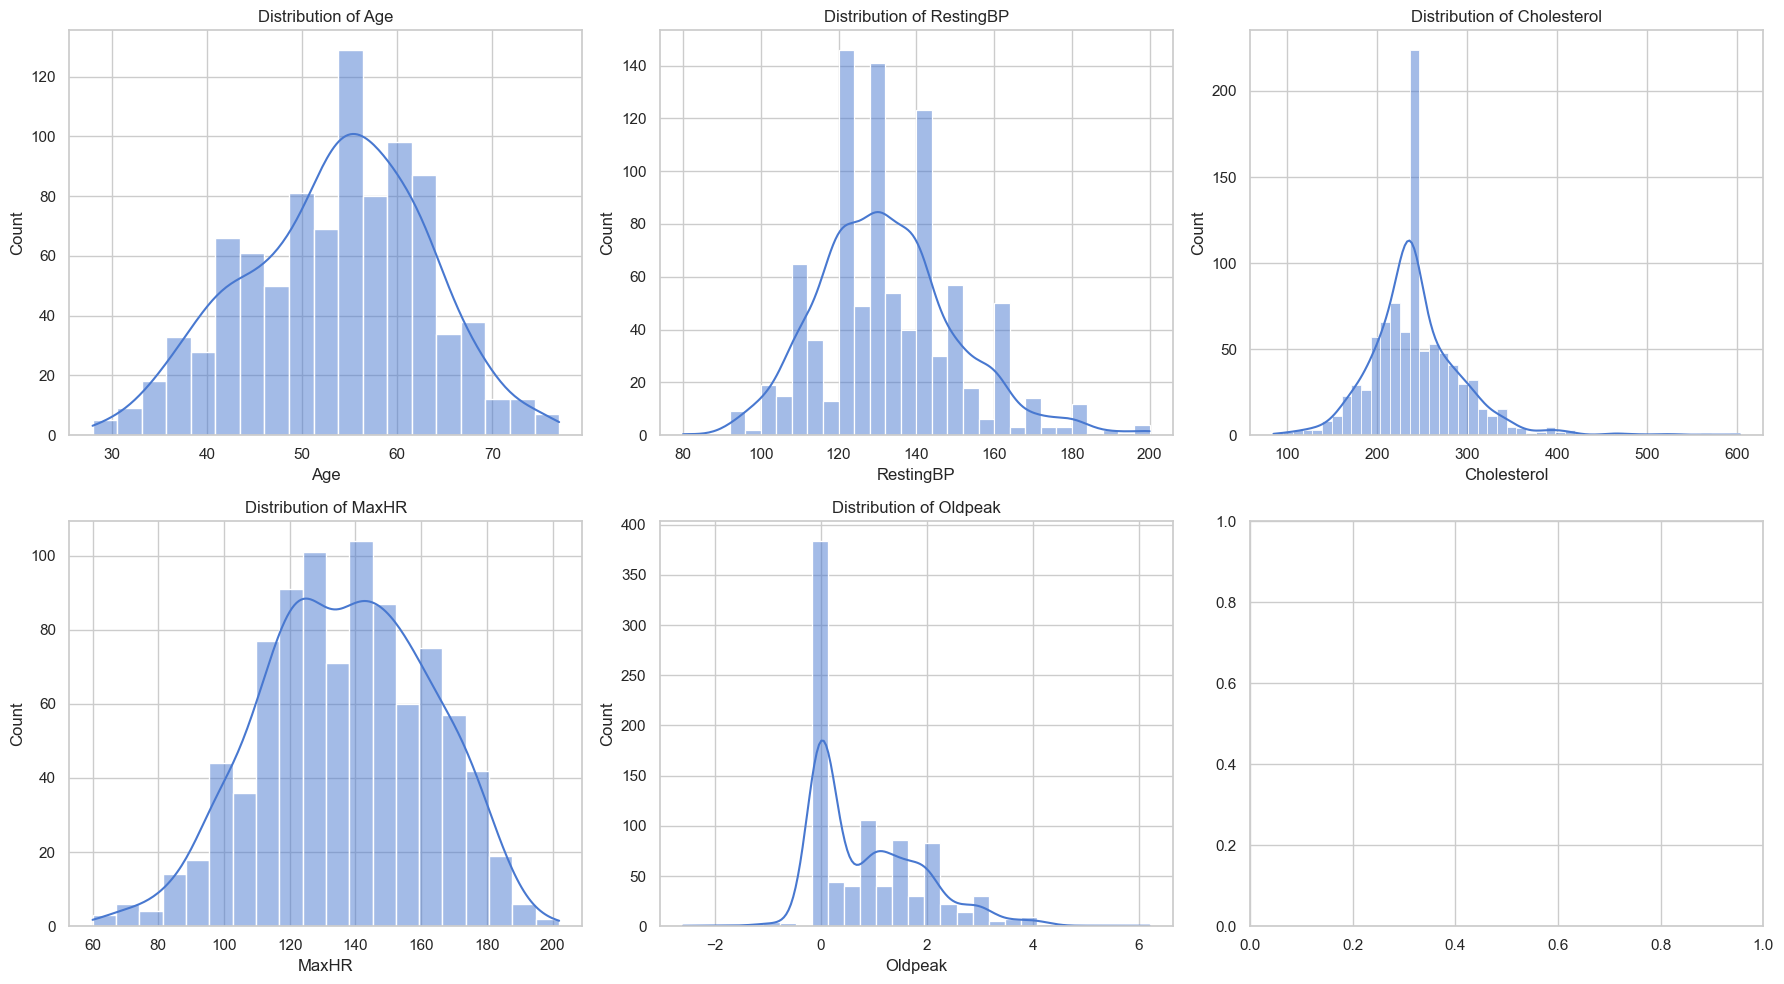

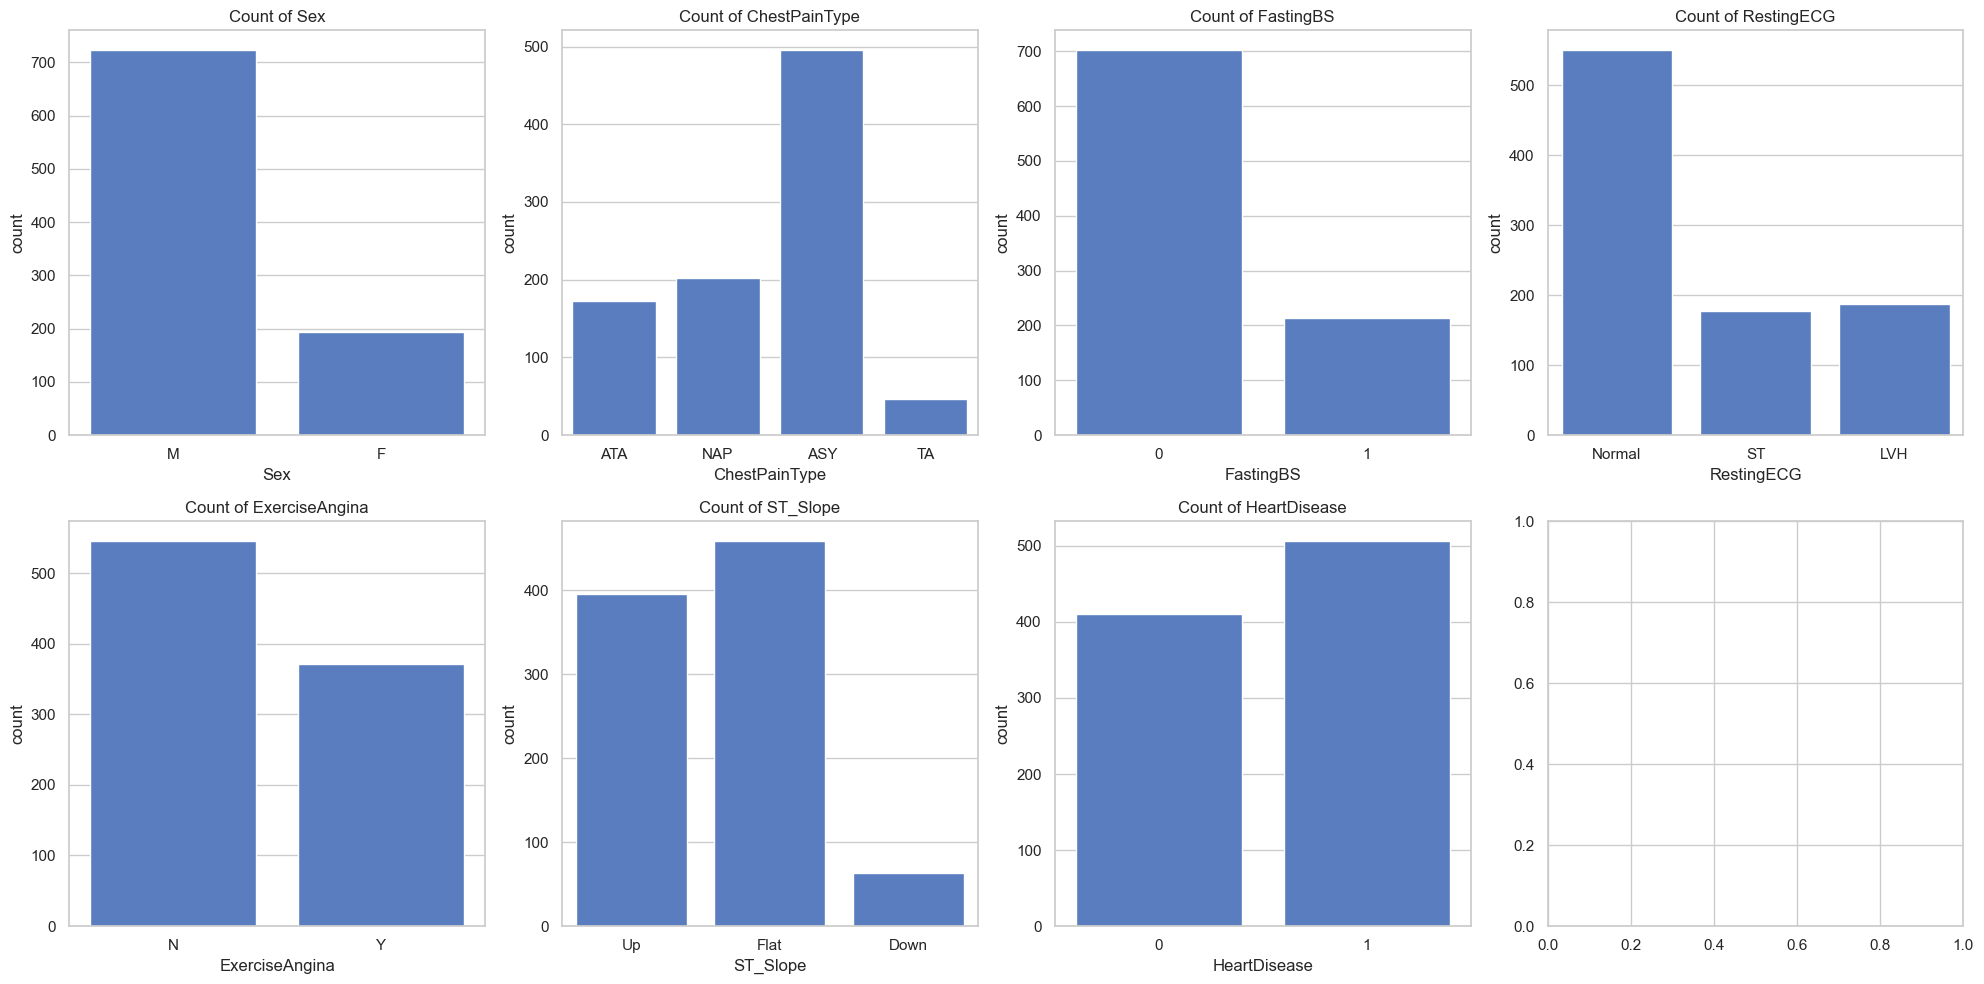

In [21]:
# Separate numerical and categorical columns
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

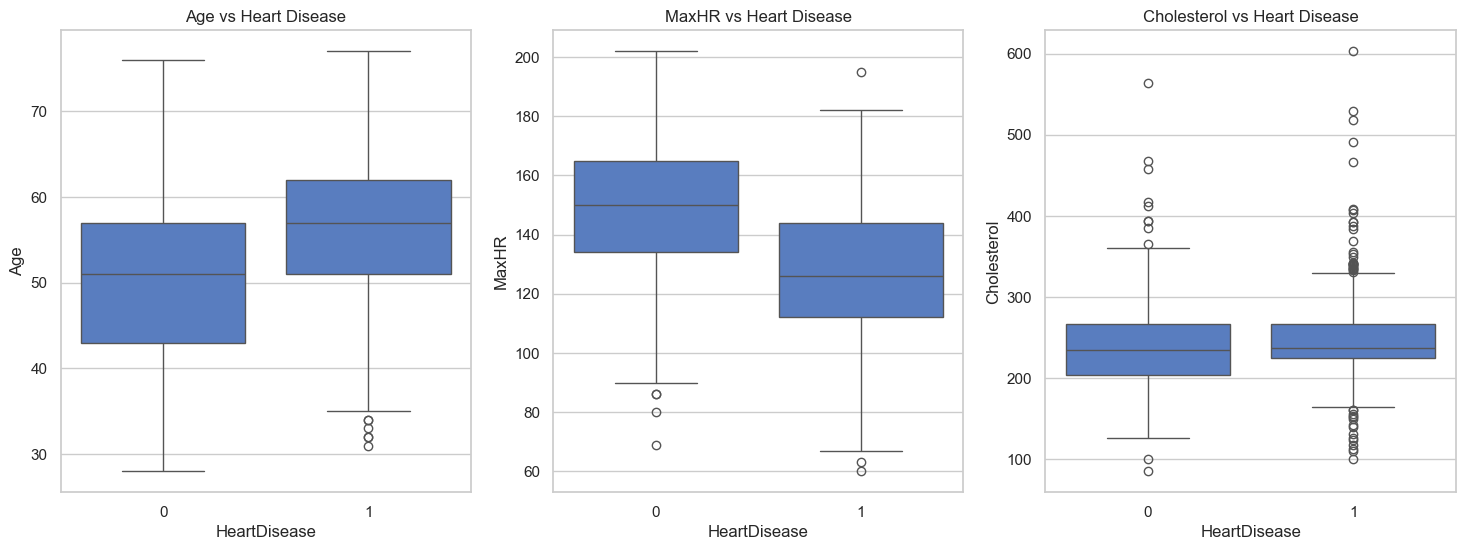

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Does Age matter?
sns.boxplot(data=df, x='HeartDisease', y='Age', ax=axes[0])
axes[0].set_title('Age vs Heart Disease')

# Does Max Heart Rate matter?
sns.boxplot(data=df, x='HeartDisease', y='MaxHR', ax=axes[1])
axes[1].set_title('MaxHR vs Heart Disease')

# Does Cholesterol matter?
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol', ax=axes[2])
axes[2].set_title('Cholesterol vs Heart Disease')

plt.show()

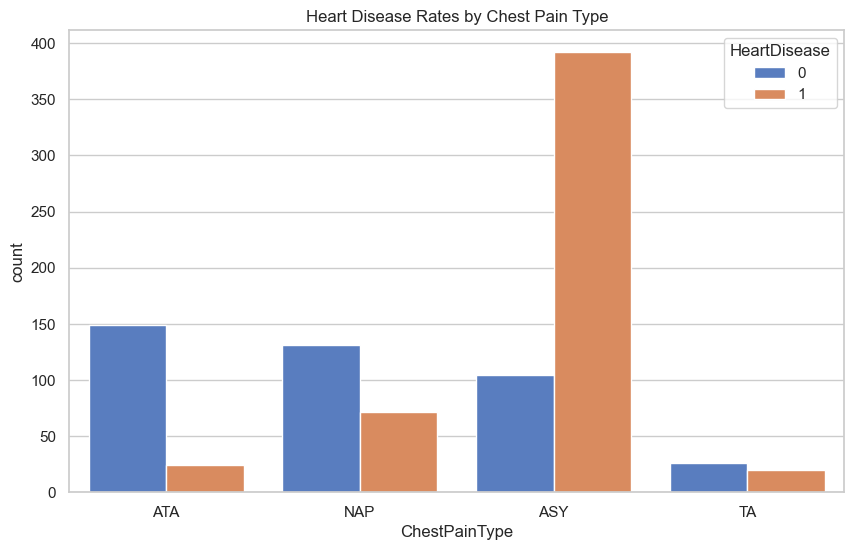

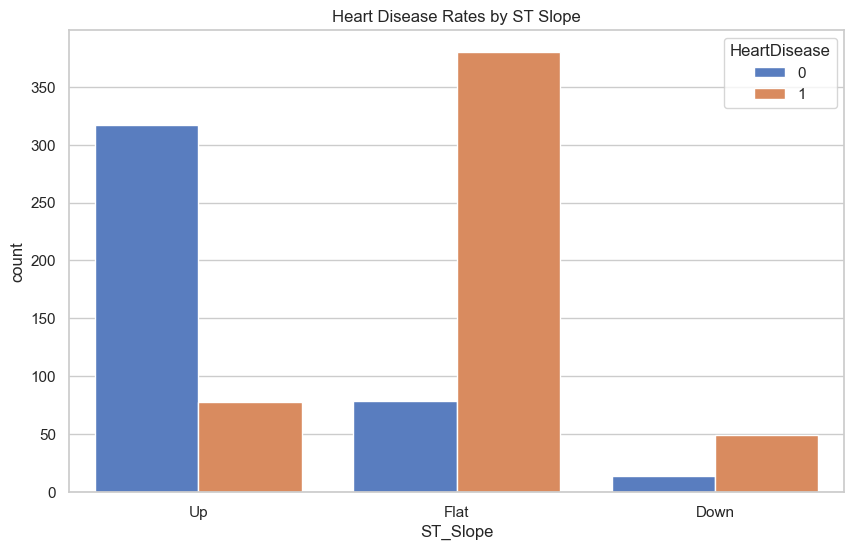

In [23]:
# Chest Pain Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Heart Disease Rates by Chest Pain Type')
plt.show()

# ST Slope Analysis 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
plt.title('Heart Disease Rates by ST Slope')
plt.show()

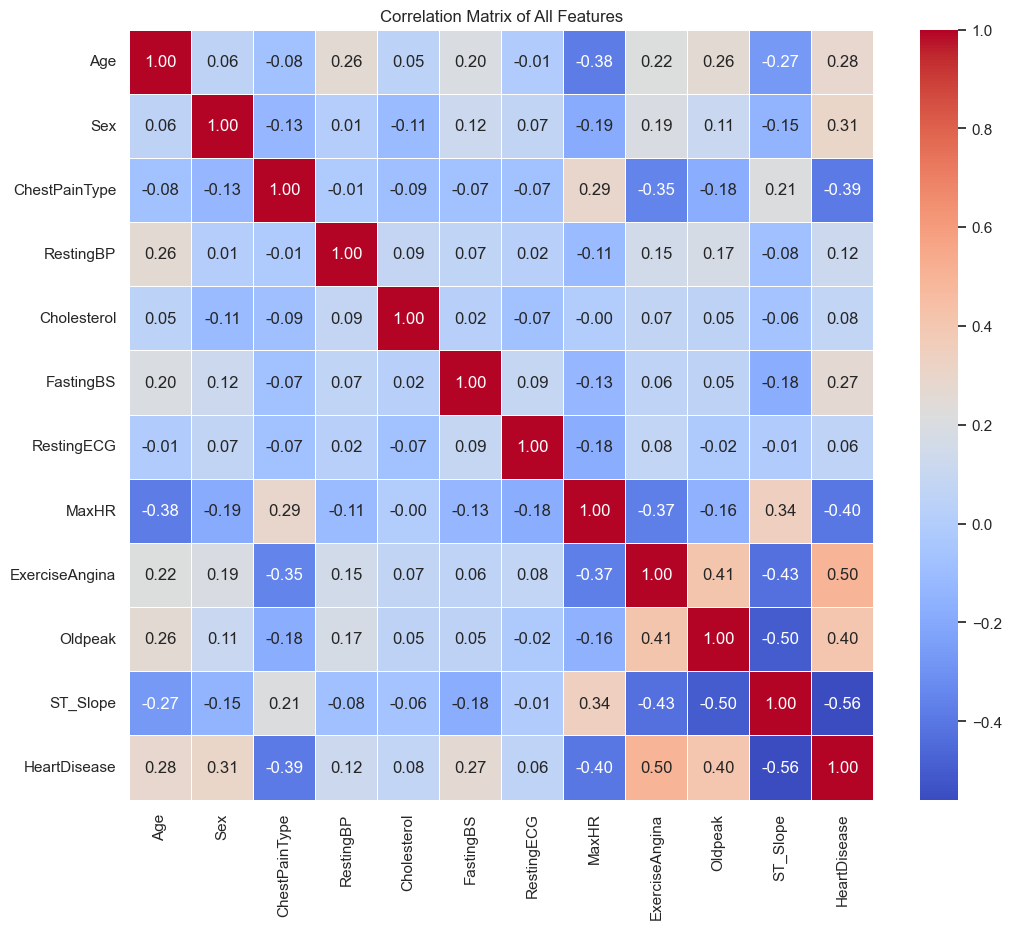

In [24]:
# Convert categorical variables to numeric codes for correlation matrix
df_corr = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()